<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/week_7_clusturing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### clustering

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from scipy.spatial.distance import minkowski, jaccard

# Two sample points
p = np.array([1, 2, 3])
q = np.array([4, 5, 6])

# Euclidean
eucl = np.linalg.norm(p-q)

# Manhattan
manh = np.sum(np.abs(p-q))

# Cosine similarity
cos_sim = cosine_similarity([p],[q])[0][0]

# Minkowski (p=3)
mink = minkowski(p, q, 3)

# Jaccard (convert to sets)
A, B = set([1,2,3]), set([2,3,4])
jacc = len(A & B) / len(A | B)

print("Euclidean:", eucl)
print("Manhattan:", manh)
print("Cosine Similarity:", cos_sim)
print("Minkowski (p=3):", mink)
print("Jaccard Index:", jacc)


Euclidean: 5.196152422706632
Manhattan: 9
Cosine Similarity: 0.9746318461970762
Minkowski (p=3): 4.3267487109222245
Jaccard Index: 0.5


### agglomarative clusturing

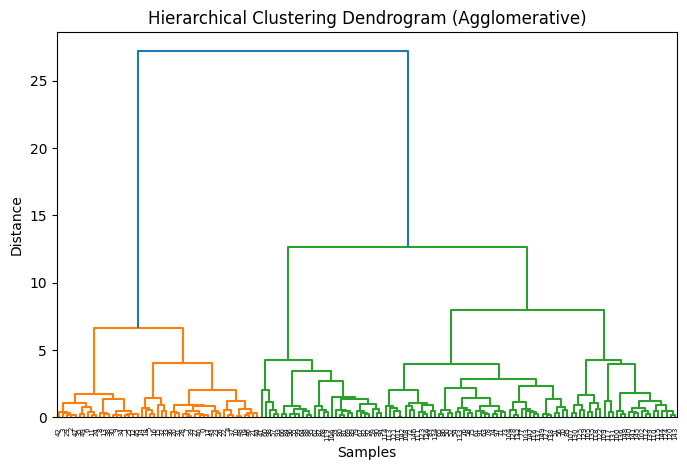

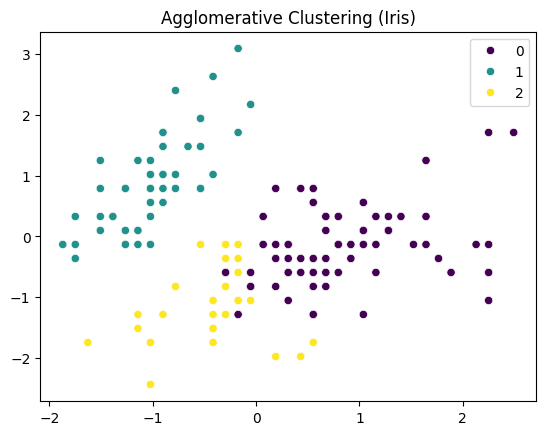

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Load dataset (Iris)
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# Dendrogram
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Agglomerative)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="viridis")
plt.title("Agglomerative Clustering (Iris)")
plt.show()


### birch

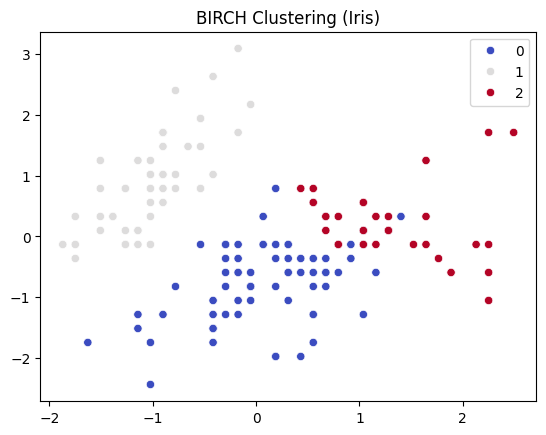

In [ ]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=birch_labels, palette="coolwarm")
plt.title("BIRCH Clustering (Iris)")
plt.show()


divisive

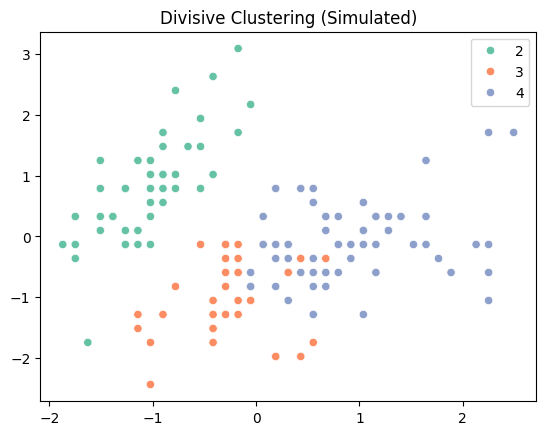

In [ ]:
from sklearn.cluster import KMeans

def divisive_clustering(X, max_clusters=3):
    clusters = {0: X}
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 1

    while len(clusters) < max_clusters:
        # Pick largest cluster to split
        largest_cluster_id = max(clusters, key=lambda k: len(clusters[k]))
        data_to_split = clusters.pop(largest_cluster_id)

        # Split into 2 using KMeans
        kmeans = KMeans(n_clusters=2, random_state=42).fit(data_to_split)
        new_labels = kmeans.labels_

        for j in range(2):
            clusters[cluster_id] = data_to_split[new_labels == j]
            labels[np.isin(X, clusters[cluster_id]).all(axis=1)] = cluster_id
            cluster_id += 1

    return labels

div_labels = divisive_clustering(X, max_clusters=3)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=div_labels, palette="Set2")
plt.title("Divisive Clustering (Simulated)")
plt.show()


### linkages

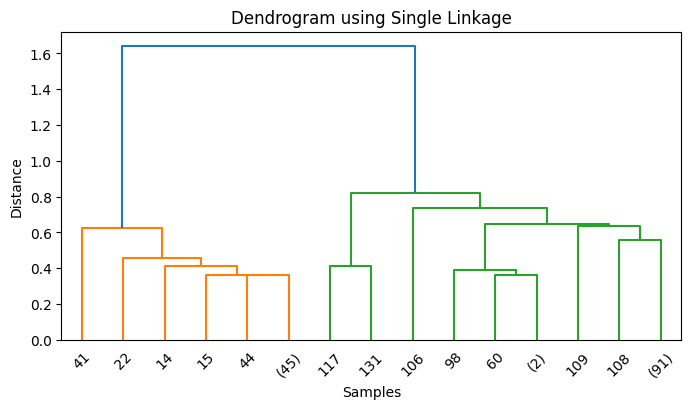

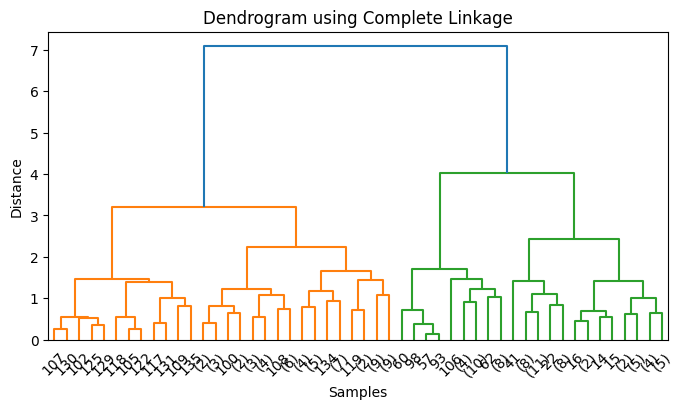

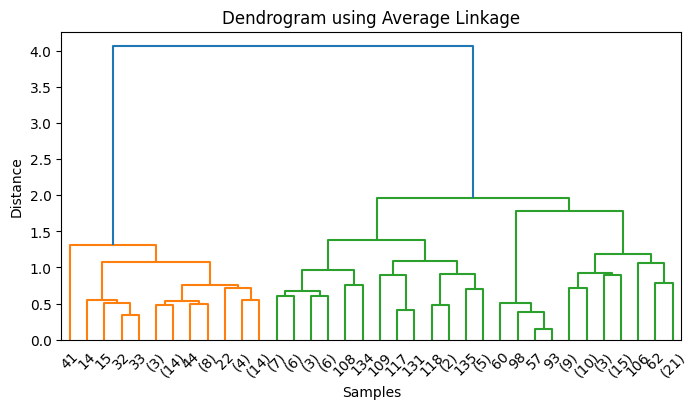

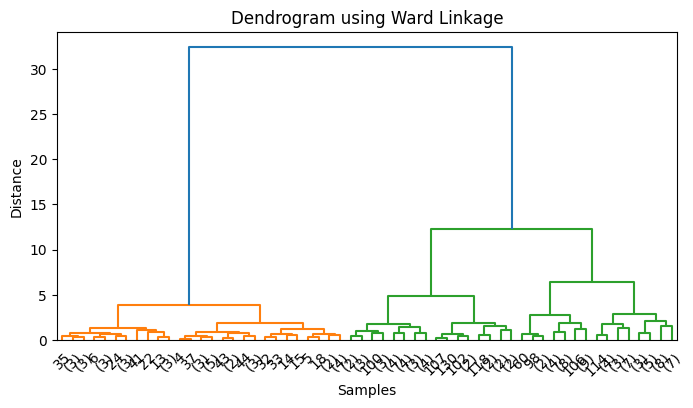

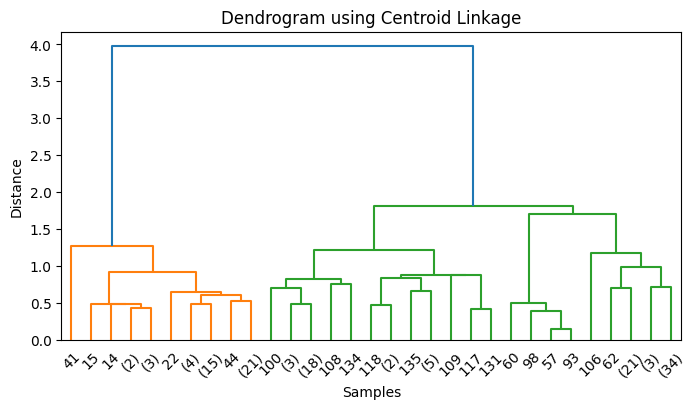

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
iris = load_iris()
X = iris.data

# Function to plot dendrogram for different linkage methods
def plot_dendrogram(linkage_method):
    linked = linkage(X, method=linkage_method)
    plt.figure(figsize=(8, 4))
    dendrogram(linked,
               truncate_mode='level',
               p=5,
               leaf_rotation=45.,
               leaf_font_size=10.)
    plt.title(f"Dendrogram using {linkage_method.title()} Linkage")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

# Apply and plot all linkages
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid']

for method in linkage_methods:
    plot_dendrogram(method)


### Implement DBSCAN clustering

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


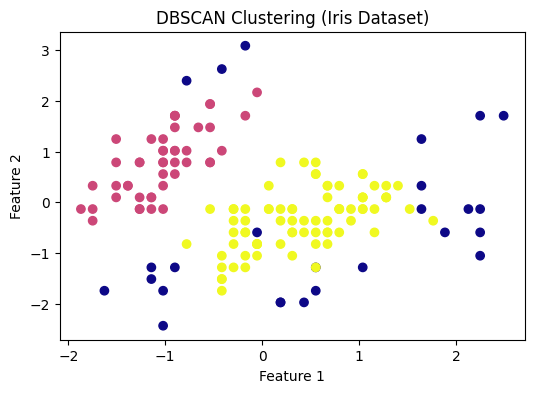

Estimated number of clusters: 2
Estimated number of noise points: 26
Silhouette Score: 0.403


In [2]:
# --------------------------------------------
# DBSCAN Clustering Example
# --------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset
iris = load_iris()
X = iris.data

# Step 1: Standardize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

# Step 3: Add cluster labels to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = y_db
print(df.head())

# Step 4: Visualize clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_db, cmap='plasma')
plt.title("DBSCAN Clustering (Iris Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 5: Evaluation
n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise = list(y_db).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Optional: Silhouette Score (for non-noise clusters)
if n_clusters > 1:
    score = silhouette_score(X_scaled, y_db)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score cannot be computed (only 1 cluster).")


### Implement Spectral Clustering

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


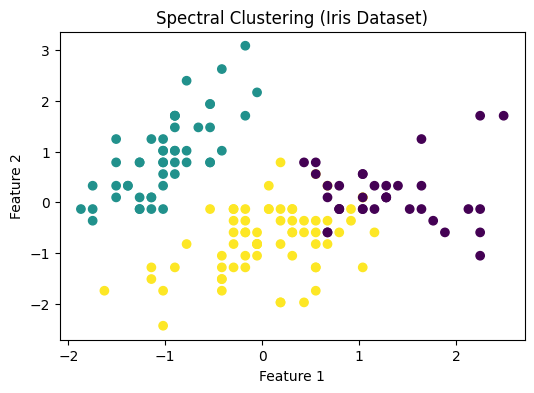

Silhouette Score: 0.459


In [3]:
# --------------------------------------------
# Spectral Clustering Example
# --------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Load dataset
iris = load_iris()
X = iris.data

# Step 1: Scale features (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply Spectral Clustering
spectral = SpectralClustering(
    n_clusters=3,          # number of clusters
    affinity='nearest_neighbors',  # build graph using nearest neighbors
    assign_labels='kmeans', # clustering after embedding
    random_state=42
)
y_spectral = spectral.fit_predict(X_scaled)

# Step 3: Add cluster labels to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = y_spectral
print(df.head())

# Step 4: Visualize clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_spectral, cmap='viridis')
plt.title("Spectral Clustering (Iris Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 5: Evaluate clustering
score = silhouette_score(X_scaled, y_spectral)
print(f"Silhouette Score: {score:.3f}")
